<a href="https://colab.research.google.com/github/Kuzay3t/Augumented-Dataset-with-SMOTE-NN/blob/main/Pipeline_location_leak2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The goal of this is to train a model to training a regression model capable of accurately predicting two leak locations simultaneously using the flow parameters present in the dataset.

The dataset was augumented using the physics informed formula implemented from the paper.



In [ ]:
# importing necessary libaries for the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file = files.upload()

Saving physics_augmented_dataset_FINAL_FINAL.csv to physics_augmented_dataset_FINAL_FINAL (2).csv


In [ ]:
data = pd.read_csv('physics_augmented_dataset_FINAL_FINAL.csv')

**Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
df = data

# Group by inflow rate to get baseline pressure drop
baseline_df = df.groupby("Inflow_Rate")["Pressure_Drop"].mean().reset_index()
baseline_df.columns = ["Inflow_Rate", "Baseline_Pressure_Drop"]

# Merge back into df
df = pd.merge(df, baseline_df, on="Inflow_Rate", how="left")

print(df.head())


   Leak_Location_1  Leak_Location_2  Inflow_Rate  Pressure_Drop  \
0              0.4             0.75     0.000313         1955.0   
1              0.4             0.75     0.000323         2028.0   
2              0.4             0.75     0.000366         2657.0   
3              0.6             0.86     0.000321         2112.0   
4              0.6             0.86     0.000344         2450.0   

   Inflow_Velocity  Outlet_Pressure  Baseline_Pressure_Drop  
0             1.26            15340             1993.355606  
1             1.30            13448             2088.321247  
2             1.47             5367             2625.309289  
3             1.30            13244             2089.948494  
4             1.39             9612             2415.700974  


In [ ]:
df["DeltaP_D"] = df["Pressure_Drop"] / df["Baseline_Pressure_Drop"]

print(df[["Pressure_Drop", "Baseline_Pressure_Drop", "DeltaP_D"]].head())
print("DeltaP_D range:", df["DeltaP_D"].min(), "to", df["DeltaP_D"].max())
df["DeltaP_D"] = df["Pressure_Drop"] / df["Baseline_Pressure_Drop"]

print(df[["Pressure_Drop", "Baseline_Pressure_Drop", "DeltaP_D"]].head())
print("DeltaP_D range:", df["DeltaP_D"].min(), "to", df["DeltaP_D"].max())


   Pressure_Drop  Baseline_Pressure_Drop  DeltaP_D
0         1955.0             1993.355606  0.980758
1         2028.0             2088.321247  0.971115
2         2657.0             2625.309289  1.012071
3         2112.0             2089.948494  1.010551
4         2450.0             2415.700974  1.014198
DeltaP_D range: 0.9137640625595822 to 1.097705930306427
   Pressure_Drop  Baseline_Pressure_Drop  DeltaP_D
0         1955.0             1993.355606  0.980758
1         2028.0             2088.321247  0.971115
2         2657.0             2625.309289  1.012071
3         2112.0             2089.948494  1.010551
4         2450.0             2415.700974  1.014198
DeltaP_D range: 0.9137640625595822 to 1.097705930306427


In [ ]:
# To avoid divide-by-zero issues, add a tiny epsilon where needed
eps = 1e-9

df["Vel_sq"]      = df["Inflow_Velocity"] ** 2
df["DP_over_v"]   = df["Pressure_Drop"] / (df["Inflow_Velocity"] + eps)
df["DP_over_Q"]   = df["Pressure_Drop"] / (df["Inflow_Rate"] + eps)
df["Q_over_Pout"] = df["Inflow_Rate"] / (df["Outlet_Pressure"] + eps)
df["v_over_Pout"] = df["Inflow_Velocity"] / (df["Outlet_Pressure"] + eps)
df["P_total"]     = df["Outlet_Pressure"] + df["Pressure_Drop"]

print(df.head())


   Leak_Location_1  Leak_Location_2  Inflow_Rate  Pressure_Drop  \
0              0.4             0.75     0.000313         1955.0   
1              0.4             0.75     0.000323         2028.0   
2              0.4             0.75     0.000366         2657.0   
3              0.6             0.86     0.000321         2112.0   
4              0.6             0.86     0.000344         2450.0   

   Inflow_Velocity  Outlet_Pressure  Baseline_Pressure_Drop  DeltaP_D  Vel_sq  \
0             1.26            15340             1993.355606  0.980758  1.5876   
1             1.30            13448             2088.321247  0.971115  1.6900   
2             1.47             5367             2625.309289  1.012071  2.1609   
3             1.30            13244             2089.948494  1.010551  1.6900   
4             1.39             9612             2415.700974  1.014198  1.9321   

     DP_over_v     DP_over_Q   Q_over_Pout  v_over_Pout  P_total  
0  1551.587300  6.245986e+06  2.040417e-08 

In [ ]:
df.to_csv("physics_augmented_with_features.csv", index=False)
print("File saved!")


File saved!


In [ ]:
df2 = pd.read_csv("physics_augmented_with_features.csv")
print(df2.head())
print(df2.columns)


   Leak_Location_1  Leak_Location_2  Inflow_Rate  Pressure_Drop  \
0              0.4             0.75     0.000313         1955.0   
1              0.4             0.75     0.000323         2028.0   
2              0.4             0.75     0.000366         2657.0   
3              0.6             0.86     0.000321         2112.0   
4              0.6             0.86     0.000344         2450.0   

   Inflow_Velocity  Outlet_Pressure  Baseline_Pressure_Drop  DeltaP_D  Vel_sq  \
0             1.26            15340             1993.355606  0.980758  1.5876   
1             1.30            13448             2088.321247  0.971115  1.6900   
2             1.47             5367             2625.309289  1.012071  2.1609   
3             1.30            13244             2089.948494  1.010551  1.6900   
4             1.39             9612             2415.700974  1.014198  1.9321   

     DP_over_v     DP_over_Q   Q_over_Pout  v_over_Pout  P_total  
0  1551.587300  6.245986e+06  2.040417e-08 

In [ ]:
df2.head()

,Leak_Location_1,Leak_Location_2,Inflow_Rate,Pressure_Drop,Inflow_Velocity,Outlet_Pressure,Baseline_Pressure_Drop,DeltaP_D,Vel_sq,DP_over_v,DP_over_Q,Q_over_Pout,v_over_Pout,P_total
0,0.4,0.75,0.000313,1955.0,1.26,15340,1993.355606,0.980758,1.5876,1551.587300,6.245986e+06,2.040417e-08,0.000082,17295.0
1,0.4,0.75,0.000323,2028.0,1.30,13448,2088.321247,0.971115,1.6900,1559.999999,6.278618e+06,2.401844e-08,0.000097,15476.0
2,0.4,0.75,0.000366,2657.0,1.47,5367,2625.309289,1.012071,2.1609,1807.482992,7.259543e+06,6.819452e-08,0.000274,8024.0
3,0.6,0.86,0.000321,2112.0,1.30,13244,2089.948494,1.010551,1.6900,1624.615383,6.579419e+06,2.423739e-08,0.000098,15356.0
4,0.6,0.86,0.000344,2450.0,1.39,9612,2415.700974,1.014198,1.9321,1762.589927,7.122072e+06,3.578860e-08,0.000145,12062.0


## **Understanding the Dataset - Data Preperation**

In [ ]:
df2.describe()

,Leak_Location_1,Leak_Location_2,Inflow_Rate,Pressure_Drop,Inflow_Velocity,Outlet_Pressure,Baseline_Pressure_Drop,DeltaP_D,Vel_sq,DP_over_v,DP_over_Q,Q_over_Pout,v_over_Pout,P_total
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03,5.030000e+03,5030.000000,5030.000000
mean,0.496461,0.494238,0.000344,2394.169857,1.385334,9960.090656,2394.169857,1.000000,1.924897,1733.320378,6.944404e+06,3.949099e-08,0.000159,12354.260513
std,0.231655,0.228500,0.000019,256.325213,0.075814,3492.114632,247.248710,0.028125,0.209694,207.560902,4.027778e+05,1.483062e-08,0.000060,3498.329630
min,0.100009,0.100042,0.000313,1857.572136,1.260000,5108.000000,1993.355606,0.913764,1.587600,1263.265065,5.934716e+06,2.040417e-08,0.000082,7044.114594
25%,0.293638,0.299161,0.000325,2161.665249,1.310000,6106.000000,2160.877374,0.979934,1.716100,1570.871534,6.638914e+06,2.535693e-08,0.000102,8670.538837
50%,0.498141,0.489937,0.000348,2415.891989,1.400000,9334.000000,2457.145351,0.998572,1.960000,1731.309938,6.945396e+06,3.581557e-08,0.000146,11809.619479
75%,0.696528,0.688696,0.000362,2600.369445,1.460000,13448.000000,2625.309289,1.018410,2.131600,1886.367764,7.220800e+06,5.439839e-08,0.000218,15844.463297
max,0.899774,0.899604,0.000371,3090.994573,1.500000,15340.000000,2868.967764,1.097706,2.250000,2375.451413,8.422306e+06,7.263117e-08,0.000294,18271.130175


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Leak_Location_1         5030 non-null   float64
 1   Leak_Location_2         5030 non-null   float64
 2   Inflow_Rate             5030 non-null   float64
 3   Pressure_Drop           5030 non-null   float64
 4   Inflow_Velocity         5030 non-null   float64
 5   Outlet_Pressure         5030 non-null   int64  
 6   Baseline_Pressure_Drop  5030 non-null   float64
 7   DeltaP_D                5030 non-null   float64
 8   Vel_sq                  5030 non-null   float64
 9   DP_over_v               5030 non-null   float64
 10  DP_over_Q               5030 non-null   float64
 11  Q_over_Pout             5030 non-null   float64
 12  v_over_Pout             5030 non-null   float64
 13  P_total                 5030 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 5

In [ ]:
df2.head(10)

,Leak_Location_1,Leak_Location_2,Inflow_Rate,Pressure_Drop,Inflow_Velocity,Outlet_Pressure,Baseline_Pressure_Drop,DeltaP_D,Vel_sq,DP_over_v,DP_over_Q,Q_over_Pout,v_over_Pout,P_total
0,0.40,0.75,0.000313,1955.0,1.26,15340,1993.355606,0.980758,1.5876,1551.587300,6.245986e+06,2.040417e-08,0.000082,17295.0
1,0.40,0.75,0.000323,2028.0,1.30,13448,2088.321247,0.971115,1.6900,1559.999999,6.278618e+06,2.401844e-08,0.000097,15476.0
2,0.40,0.75,0.000366,2657.0,1.47,5367,2625.309289,1.012071,2.1609,1807.482992,7.259543e+06,6.819452e-08,0.000274,8024.0
3,0.60,0.86,0.000321,2112.0,1.30,13244,2089.948494,1.010551,1.6900,1624.615383,6.579419e+06,2.423739e-08,0.000098,15356.0
4,0.60,0.86,0.000344,2450.0,1.39,9612,2415.700974,1.014198,1.9321,1762.589927,7.122072e+06,3.578860e-08,0.000145,12062.0
5,0.60,0.86,0.000358,2509.0,1.44,6580,2486.332606,1.009117,2.0736,1742.361110,7.008360e+06,5.440729e-08,0.000219,9089.0
6,0.14,0.60,0.000320,2141.0,1.29,14792,2118.516297,1.010613,1.6641,1659.689921,6.690604e+06,2.163332e-08,0.000087,16933.0
7,0.14,0.60,0.000352,2571.0,1.42,9068,2505.577066,1.026111,2.0164,1810.563379,7.303957e+06,3.881782e-08,0.000157,11639.0
8,0.14,0.60,0.000370,2770.0,1.49,5891,2747.335042,1.008250,2.2201,1859.060401,7.486466e+06,6.280767e-08,0.000253,8661.0
9,0.14,0.39,0.000325,2176.0,1.31,13758,2160.877374,1.006998,1.7161,1661.068701,6.695364e+06,2.362262e-08,0.000095,15934.0


In [ ]:
df2.columns

Index(['Leak_Location_1', 'Leak_Location_2', 'Inflow_Rate', 'Pressure_Drop',
       'Inflow_Velocity', 'Outlet_Pressure', 'Baseline_Pressure_Drop',
       'DeltaP_D', 'Vel_sq', 'DP_over_v', 'DP_over_Q', 'Q_over_Pout',
       'v_over_Pout', 'P_total'],
      dtype='object')

Leak_Location_1           1.000093e-01
Leak_Location_2           1.000423e-01
Inflow_Rate               3.130000e-04
Pressure_Drop             1.857572e+03
Inflow_Velocity           1.260000e+00
Outlet_Pressure           5.108000e+03
Baseline_Pressure_Drop    1.993356e+03
DeltaP_D                  9.137641e-01
Vel_sq                    1.587600e+00
DP_over_v                 1.263265e+03
DP_over_Q                 5.934716e+06
Q_over_Pout               2.040417e-08
v_over_Pout               8.213820e-05
P_total                   7.044115e+03
dtype: float64
Leak_Location_1           8.997741e-01
Leak_Location_2           8.996042e-01
Inflow_Rate               3.710000e-04
Pressure_Drop             3.090995e+03
Inflow_Velocity           1.500000e+00
Outlet_Pressure           1.534000e+04
Baseline_Pressure_Drop    2.868968e+03
DeltaP_D                  1.097706e+00
Vel_sq                    2.250000e+00
DP_over_v                 2.375451e+03
DP_over_Q                 8.422306e+06
Q_over_Pou

<Axes: >

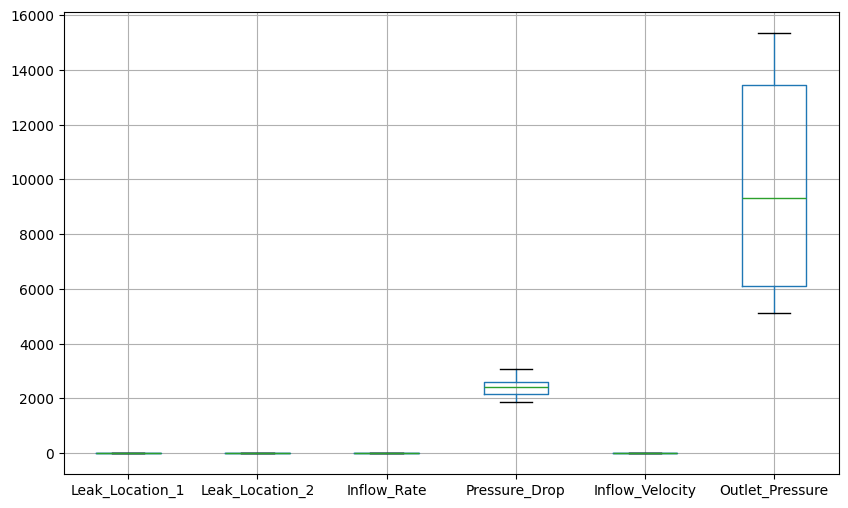

In [ ]:
print(df2.min())
print(df2.max())

data.boxplot(figsize=(10,6))


**Visualising the Dataset**

array([[<Axes: title={'center': 'Leak_Location_1'}>,
        <Axes: title={'center': 'Leak_Location_2'}>,
        <Axes: title={'center': 'Inflow_Rate'}>,
        <Axes: title={'center': 'Pressure_Drop'}>],
       [<Axes: title={'center': 'Inflow_Velocity'}>,
        <Axes: title={'center': 'Outlet_Pressure'}>,
        <Axes: title={'center': 'Baseline_Pressure_Drop'}>,
        <Axes: title={'center': 'DeltaP_D'}>],
       [<Axes: title={'center': 'Vel_sq'}>,
        <Axes: title={'center': 'DP_over_v'}>,
        <Axes: title={'center': 'DP_over_Q'}>,
        <Axes: title={'center': 'Q_over_Pout'}>],
       [<Axes: title={'center': 'v_over_Pout'}>,
        <Axes: title={'center': 'P_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

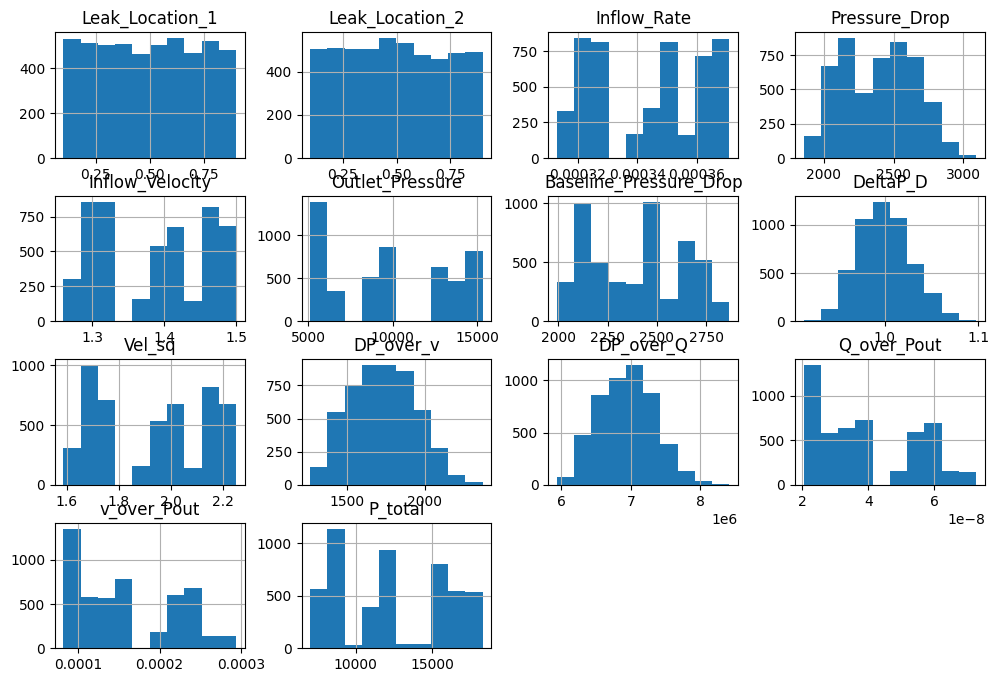

In [ ]:
# plotting the columns on a historgram
df2.hist(figsize=(12,8), bins = 10)

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Leak_Location_1', ylabel='Leak_Location_2'>

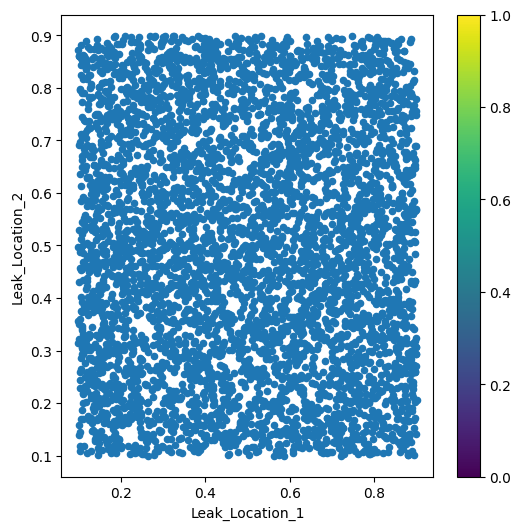

In [ ]:
# plotting scatterplots to understand the relationships between variables

df2.plot(kind = "scatter", x = "Leak_Location_1", y = "Leak_Location_2", cmap = "jet", figsize=(6,6), colorbar = True)
# no linear relationship between leak location 1 and 2

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Inflow_Velocity', ylabel='Leak_Location_2'>

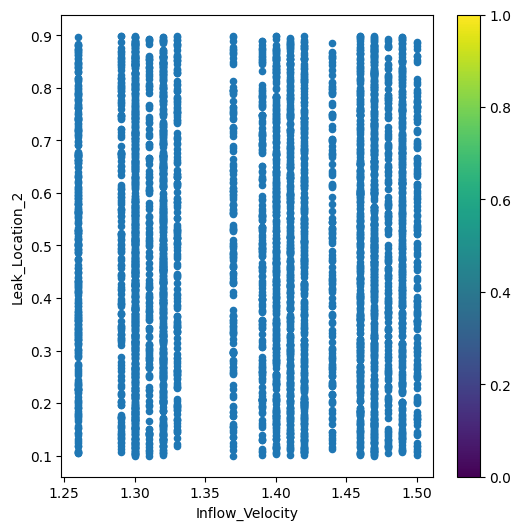

In [ ]:
# plotting scatterplots to understand the relationships between variables

df2.plot(kind = "scatter", x = "Inflow_Velocity", y = "Leak_Location_2", cmap = "jet", figsize=(6,6), colorbar = True)
# There is NO direct physical relationship between these variables

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Inflow_Velocity', ylabel='Pressure_Drop'>

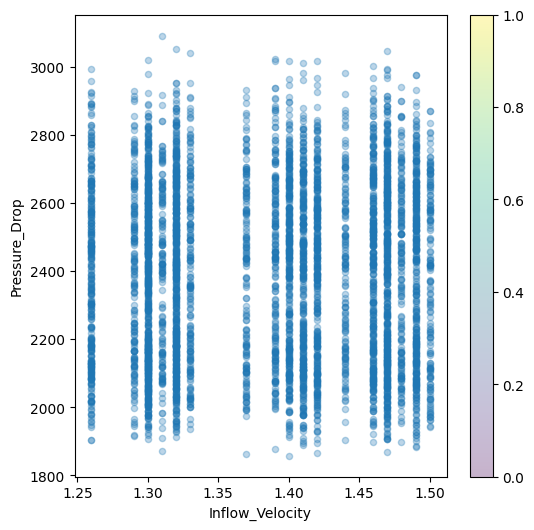

In [ ]:
df2.plot(kind = "scatter", x = "Inflow_Velocity", y = "Pressure_Drop", cmap = "jet", figsize=(6,6), colorbar = True, alpha = 0.3)
# There is NO direct physical relationship between these variables


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Inflow_Rate', ylabel='Pressure_Drop'>

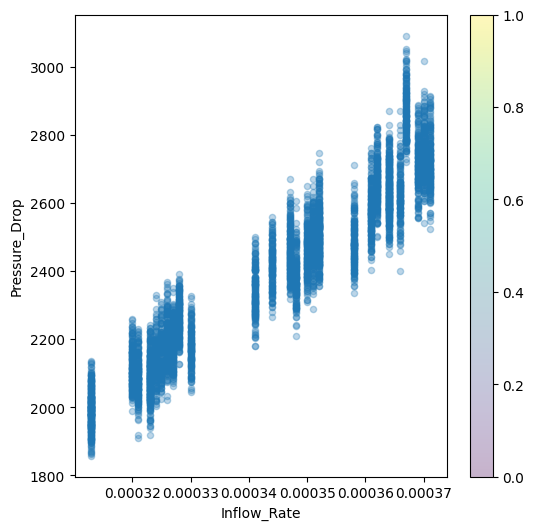

In [ ]:
df2.plot(kind = "scatter", x = "Inflow_Rate", y = "Pressure_Drop", cmap = "jet", figsize=(6,6), colorbar = True, alpha = 0.3)
# There is a positive linear relationship between this variables

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Inflow_Rate', ylabel='Inflow_Velocity'>

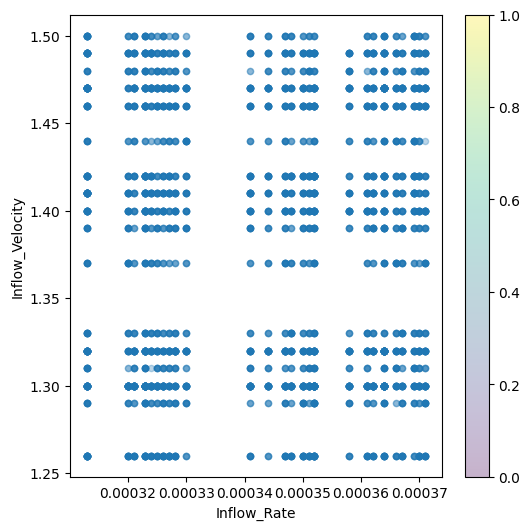

In [ ]:
df2.plot(kind = "scatter", x = "Inflow_Rate", y = "Inflow_Velocity", cmap = "jet", figsize=(6,6), colorbar = True, alpha = 0.3)
# There is a positive linear relationship between this variables

In [ ]:
# to find the correlating value then use the corr() method
# to find the correlation of each varaible to Leak location 1 using the pearson correlation co-efficient

corr_matrix = df2.corr(numeric_only = True)
corr_matrix["Leak_Location_1"].sort_values(ascending=False)

,Leak_Location_1
Leak_Location_1,1.000000
DeltaP_D,0.195596
DP_over_Q,0.101269
Pressure_Drop,0.060494
DP_over_v,0.057809
Inflow_Rate,0.011209
Baseline_Pressure_Drop,0.009412
P_total,0.008393
Outlet_Pressure,0.003968
Q_over_Pout,-0.003767


In [ ]:

corr_leak2 = df2.corr(numeric_only = True)
corr_leak2["Leak_Location_2"].sort_values(ascending=False)

,Leak_Location_2
Leak_Location_2,1.000000
DeltaP_D,0.671387
DP_over_Q,0.319950
Pressure_Drop,0.168622
DP_over_v,0.148810
v_over_Pout,0.010783
Q_over_Pout,0.009191
Vel_sq,0.002615
P_total,0.002443
Inflow_Velocity,0.002110


array([[<Axes: xlabel='Leak_Location_1', ylabel='Leak_Location_1'>,
        <Axes: xlabel='Leak_Location_2', ylabel='Leak_Location_1'>,
        <Axes: xlabel='Outlet_Pressure', ylabel='Leak_Location_1'>,
        <Axes: xlabel='Inflow_Rate', ylabel='Leak_Location_1'>,
        <Axes: xlabel='Inflow_Velocity', ylabel='Leak_Location_1'>,
        <Axes: xlabel='Pressure_Drop', ylabel='Leak_Location_1'>],
       [<Axes: xlabel='Leak_Location_1', ylabel='Leak_Location_2'>,
        <Axes: xlabel='Leak_Location_2', ylabel='Leak_Location_2'>,
        <Axes: xlabel='Outlet_Pressure', ylabel='Leak_Location_2'>,
        <Axes: xlabel='Inflow_Rate', ylabel='Leak_Location_2'>,
        <Axes: xlabel='Inflow_Velocity', ylabel='Leak_Location_2'>,
        <Axes: xlabel='Pressure_Drop', ylabel='Leak_Location_2'>],
       [<Axes: xlabel='Leak_Location_1', ylabel='Outlet_Pressure'>,
        <Axes: xlabel='Leak_Location_2', ylabel='Outlet_Pressure'>,
        <Axes: xlabel='Outlet_Pressure', ylabel='Outlet_Pr

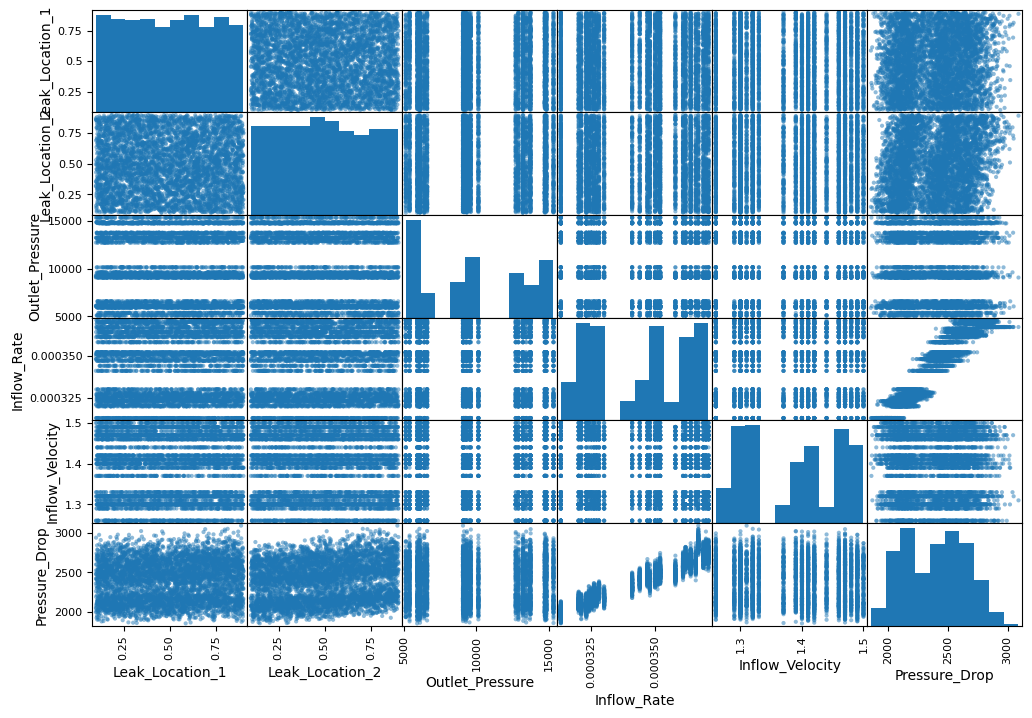

In [ ]:
# understanding the data through a scatter matrix


import pandas as pd
from pandas.plotting import scatter_matrix
features = [ "Leak_Location_1", "Leak_Location_2", "Outlet_Pressure", "Inflow_Rate", "Inflow_Velocity", "Pressure_Drop"]
scatter_matrix(df2[features], figsize = (12,8), grid = True)
# from the scatter matrix - we can see that only inflow_rate and pressure_drop are postively correlated while other features are non-linearly correlated

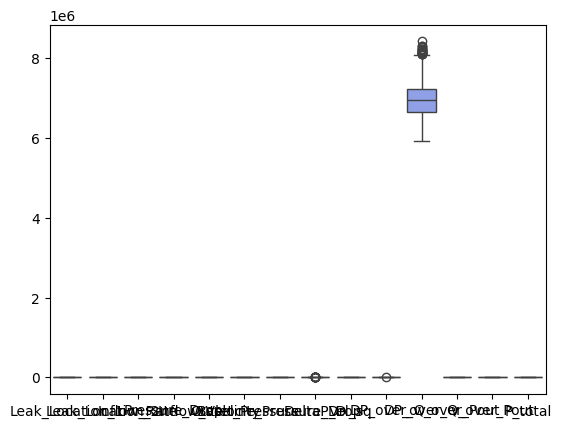

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df2)
plt.show()


In [ ]:
# naming the targets of the varible

y = df2[['Leak_Location_1', 'Leak_Location_2']]
x = df2[['Inflow_Rate', 'Pressure_Drop' ,'Inflow_Velocity','Outlet_Pressure', 'Baseline_Pressure_Drop',
       'DeltaP_D', 'Vel_sq', 'DP_over_v', 'DP_over_Q', 'Q_over_Pout',
       'v_over_Pout', 'P_total']]

In [ ]:
df2.dtypes

,0
Leak_Location_1,float64
Leak_Location_2,float64
Inflow_Rate,float64
Pressure_Drop,float64
Inflow_Velocity,float64
Outlet_Pressure,int64
Baseline_Pressure_Drop,float64
DeltaP_D,float64
Vel_sq,float64
DP_over_v,float64


## **Model Development**

In [ ]:
# splitting data into test and train

from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.transform(x_test)

**RANDOM FOREST**

In [ ]:
# import necessary libaries

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# multiouput regressor is used as we are predicting the locations of the two leak locations simulatenously

In [ ]:
# the forest baseline

base_rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model = MultiOutputRegressor(base_rf)


In [ ]:
# fitting the rf model

rf_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=600,
                                                     n_jobs=-1,
                                                     random_state=42))

In [ ]:
# making predictions from the model

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf  = rf_model.predict(X_test_scaled)

In [ ]:
import numpy as np
# evaluating the rf model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("OUTPUT METRICS (TEST SET)\n")
for i, name in enumerate(["Leak_Location_1", "Leak_Location_2"]):
    mae  = mean_absolute_error(y_test.iloc[:, i], y_test_pred_rf[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred_rf[:, i]))
    r2   = r2_score(y_test.iloc[:, i], y_test_pred_rf[:, i])
    print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

print("\nJOINT METRICS (TEST SET)\n")
mae_joint  = mean_absolute_error(y_test, y_test_pred_rf)
rmse_joint = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_joint   = r2_score(y_test, y_test_pred_rf)
print(f"MAE={mae_joint:.4f}, RMSE={rmse_joint:.4f}, R²={r2_joint:.4f}")

print("\TRAIN SET METRICS (OVERFITTING CHECK)\n")
mae_train  = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train   = r2_score(y_train, y_train_pred_rf)
print(f"TRAIN MAE={mae_train:.4f}, RMSE={rmse_train:.4f}, R²={r2_train:.4f}")

OUTPUT METRICS (TEST SET)

Leak_Location_1: MAE=0.2014, RMSE=0.2368, R²=-0.0484
Leak_Location_2: MAE=0.1401, RMSE=0.1738, R²=0.4232

JOINT METRICS (TEST SET)

MAE=0.1708, RMSE=0.2077, R²=0.1874
\TRAIN SET METRICS (OVERFITTING CHECK)

TRAIN MAE=0.0650, RMSE=0.0789, R²=0.8830


<>:19: SyntaxWarning: invalid escape sequence '\T'
<>:19: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3044445641.py:19: SyntaxWarning: invalid escape sequence '\T'
  print("\TRAIN SET METRICS (OVERFITTING CHECK)\n")


**XGBOOST MODEL**

In [ ]:
# importinvg necessary libaries

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
# defining the xgb model

base_xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_model = MultiOutputRegressor(base_xgb)

In [ ]:
# fittig the model

xgb_model.fit(X_train_scaled, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.03, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=800, n_jobs=-1,
                                            num_parallel_tree=None, ...))

In [ ]:
# making predictions on the test and train dataset

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb  = xgb_model.predict(X_test_scaled)


In [ ]:
# evaluating the xgb performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("=== PER-OUTPUT METRICS (TEST SET) — XGBoost ===\n")
for i, name in enumerate(["Leak_Location_1", "Leak_Location_2"]):
    mae  = mean_absolute_error(y_test.iloc[:, i], y_test_pred_xgb[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_test_pred_xgb[:, i]))
    r2   = r2_score(y_test.iloc[:, i], y_test_pred_xgb[:, i])
    print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

print("\n=== JOINT METRICS (TEST SET) — XGBoost ===\n")
mae_joint  = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_joint = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_joint   = r2_score(y_test, y_test_pred_xgb)
print(f"MAE={mae_joint:.4f}, RMSE={rmse_joint:.4f}, R²={r2_joint:.4f}")

print("\n=== TRAIN SET METRICS (OVERFITTING CHECK) — XGBoost ===\n")
mae_train  = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train   = r2_score(y_train, y_train_pred_xgb)
print(f"TRAIN MAE={mae_train:.4f}, RMSE={rmse_train:.4f}, R²={r2_train:.4f}")

=== PER-OUTPUT METRICS (TEST SET) — XGBoost ===

Leak_Location_1: MAE=0.2079, RMSE=0.2486, R²=-0.1557
Leak_Location_2: MAE=0.1467, RMSE=0.1837, R²=0.3558

=== JOINT METRICS (TEST SET) — XGBoost ===

MAE=0.1773, RMSE=0.2186, R²=0.1001

=== TRAIN SET METRICS (OVERFITTING CHECK) — XGBoost ===

TRAIN MAE=0.0229, RMSE=0.0307, R²=0.9823
